In [1]:
import pandas as pd
import numpy as np

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline

In [68]:
plt.rcParams['figure.figsize'] = (12,8)

In [8]:
df = pd.read_csv(r'C:\Users\Jason\Downloads\movies.csv', encoding = "ISO-8859-1")

In [10]:
# Just checking out what kind of data im working with
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


<AxesSubplot:>

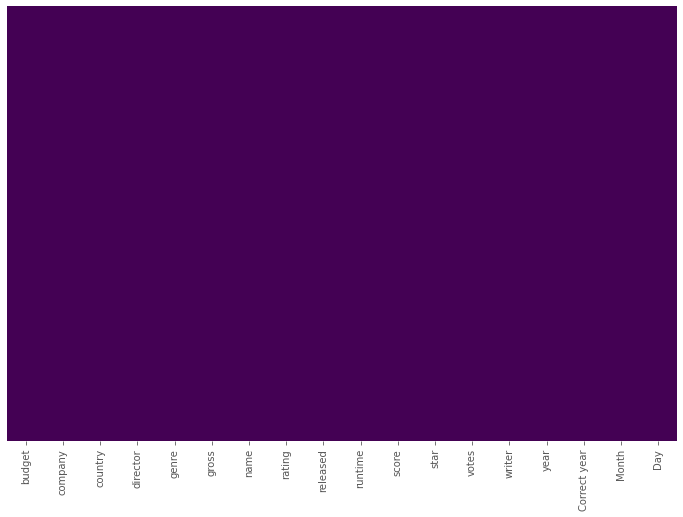

In [69]:
# Checking to see if there is any missing data. If there was any missing data, there would be yellow on the heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# Checking data types
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [15]:
# Changing the data types to make it slightly cleaner
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['score'] = df['score'].astype('int64')

In [16]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6,Joey Cramer,36636,Mark H. Baker,1986


In [18]:
# Converting the released column to datetime from object data type
df['released'] = pd.to_datetime(df['released'], errors='coerce')

In [19]:
# Seperating the columns and correcting the year for some entries
df['Correct year'] = df['released'].dt.year
df['Month'] = df['released'].dt.month
df['Day'] = df['released'].dt.day

In [21]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Correct year,Month,Day
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8,Wil Wheaton,299174,Stephen King,1986,1986,8,22
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7,Matthew Broderick,264740,John Hughes,1986,1986,6,11
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6,Tom Cruise,236909,Jim Cash,1986,1986,5,16
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8,Sigourney Weaver,540152,James Cameron,1986,1986,7,18
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6,Joey Cramer,36636,Mark H. Baker,1986,1986,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5,Jennifer Saunders,9161,Jennifer Saunders,2016,2016,7,22
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4,Selma Blair,1959,Paige Cameron,2016,2016,5,6
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6,Kevin Conroy,36333,Brian Azzarello,2016,2016,7,25
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6,Kika Magalhães,6947,Nicolas Pesce,2016,2016,12,2


Text(0, 0.5, 'Gross Earnings')

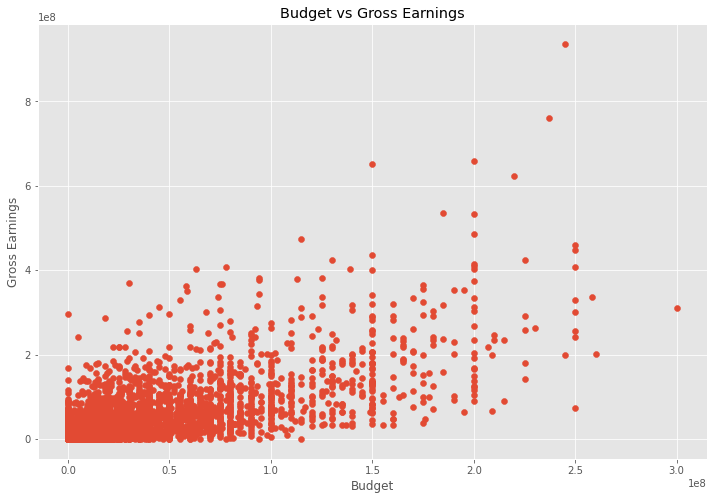

In [70]:
# Plotting using Matplotlib
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

<AxesSubplot:xlabel='budget', ylabel='gross'>

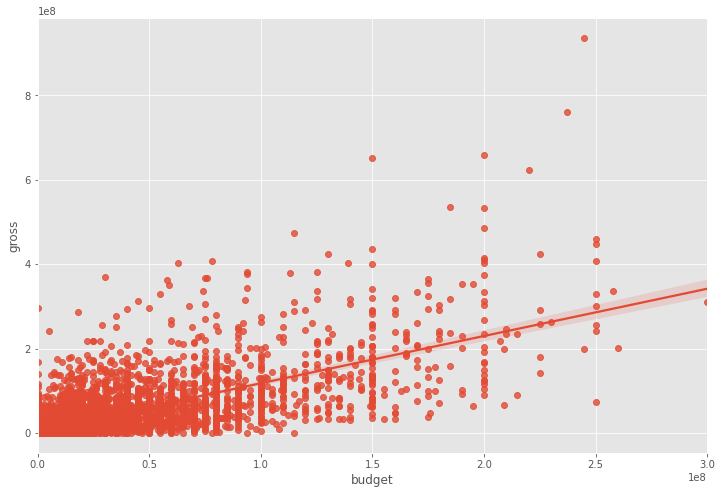

In [71]:
# Plotting the same thing using Seaborn (much easier)
sns.regplot(x='budget',y='gross',data=df)

In [42]:
# Checking how many different types of genres there are
df['genre'].nunique()

17

<AxesSubplot:xlabel='genre', ylabel='count'>

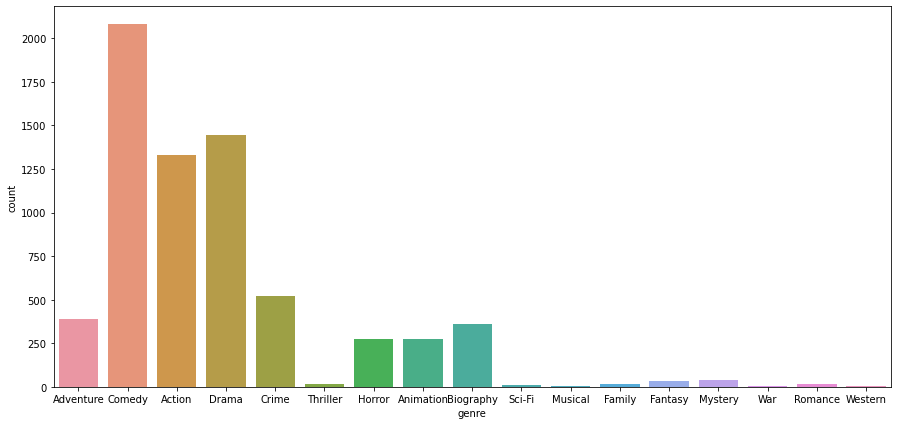

In [40]:
# Checking the count of all movies based off genre
plt.figure(figsize=(15,7))
sns.countplot(x='genre',data=df)

In [50]:
# checking Correlation 
df.corr(method='pearson')

,budget,gross,runtime,score,votes,year,Correct year,Month,Day
budget,1.000000,0.712196,0.268226,0.042135,0.503924,0.291009,0.274820,0.078115,0.007879
gross,0.712196,1.000000,0.224579,0.163619,0.662457,0.191548,0.176879,0.067341,0.000252
runtime,0.268226,0.224579,1.000000,0.379160,0.317399,0.087639,0.088342,0.069643,0.009612
score,0.042135,0.163619,0.379160,1.000000,0.383219,0.109555,0.121184,0.045233,-0.000784
votes,0.503924,0.662457,0.317399,0.383219,1.000000,0.229304,0.220797,0.061439,0.000934
year,0.291009,0.191548,0.087639,0.109555,0.229304,1.000000,0.996229,0.005223,0.027581
Correct year,0.274820,0.176879,0.088342,0.121184,0.220797,0.996229,1.000000,-0.012622,0.025770
Month,0.078115,0.067341,0.069643,0.045233,0.061439,0.005223,-0.012622,1.000000,-0.005265
Day,0.007879,0.000252,0.009612,-0.000784,0.000934,0.027581,0.025770,-0.005265,1.000000


Text(87.0, 0.5, 'Movie Features')

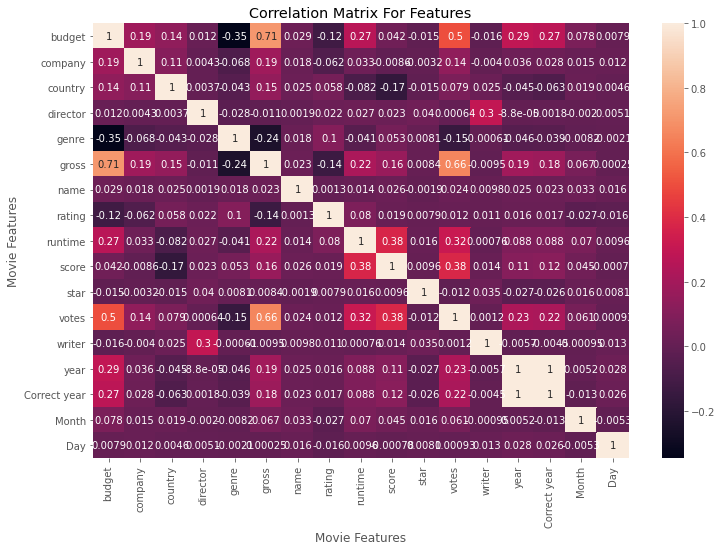

In [72]:
# Correlation Matrix
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix For Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [73]:
# Turning object strings into numbers 
df_num = df
for col_name in df_num.columns:
    if(df_num[col_name].dtype=='object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df_num

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Correct year,Month,Day
0,8000000,665,54,2192,1,52287414,4661,8,1986-08-22,89,8,2454,299174,3716,1986,1986,8,22
1,6000000,1680,54,1296,4,70136369,1821,7,1986-06-11,103,7,1605,264740,1970,1986,1986,6,11
2,15000000,1680,54,2645,0,179800601,6203,6,1986-05-16,110,6,2345,236909,1852,1986,1986,5,16
3,18500000,2062,54,1066,0,85160248,295,8,1986-07-18,137,8,2192,540152,1629,1986,1986,7,18
4,9000000,2122,54,2123,1,18564613,1872,6,1986-08-01,90,6,1139,36636,2549,1986,1986,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2016-07-22,91,5,1066,9161,1800,2016,2016,7,22
6816,0,1914,54,1989,6,28368,3430,7,2016-05-06,90,4,2146,1959,3008,2016,2016,5,6
6817,3500000,2124,54,2313,2,3775000,577,8,2016-07-25,76,6,1355,36333,450,2016,2016,7,25
6818,0,415,54,1914,6,25981,5272,8,2016-12-02,76,6,1370,6947,2946,2016,2016,12,2


Text(87.0, 0.5, 'Movie Features')

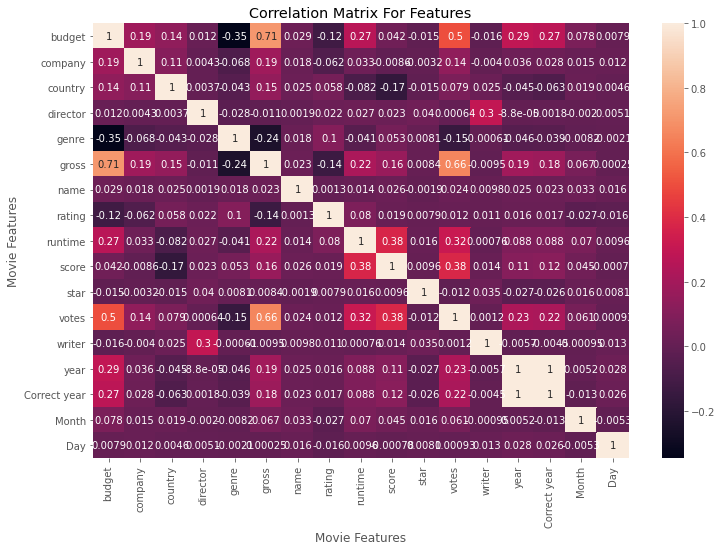

In [74]:
# Correlation Matrix using the numbers version of the data
correlation_matrix = df_num.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix For Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [75]:
df_num.corr()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,Correct year,Month,Day
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.268226,0.042135,-0.015061,0.503924,-0.015611,0.291009,0.274820,0.078115,0.007879
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.033058,-0.008646,-0.003160,0.138662,-0.004032,0.036272,0.028012,0.015444,0.011906
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.081796,-0.166080,-0.014566,0.078657,0.024981,-0.045204,-0.062707,0.018540,0.004626
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.026779,0.022623,0.039813,0.000639,0.298997,-0.000088,0.001822,-0.001951,0.005095
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.041357,0.053146,0.008140,-0.150519,-0.000608,-0.046259,-0.039014,-0.008202,-0.002123
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.224579,0.163619,0.008382,0.662457,-0.009455,0.191548,0.176879,0.067341,0.000252
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.013942,0.025532,-0.001910,0.023665,0.009821,0.024624,0.023411,0.032554,0.015660
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.079542,0.019305,0.007893,0.011678,0.010740,0.016221,0.017438,-0.026935,-0.016426
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,1.000000,0.379160,0.016019,0.317399,0.000759,0.087639,0.088342,0.069643,0.009612
score,0.042135,-0.008646,-0.166080,0.022623,0.053146,0.163619,0.025532,0.019305,0.379160,1.000000,0.009647,0.383219,0.014287,0.109555,0.121184,0.045233,-0.000784


In [76]:
correlation_mat = df_num.corr()
corr_pairs = correlation_mat.unstack()

In [78]:
# Pairing up the correlations
corr_pairs

budget  budget          1.000000
        company         0.187205
        country         0.137635
        director        0.011602
        genre          -0.346794
                          ...   
Day     writer          0.013390
        year            0.027581
        Correct year    0.025770
        Month          -0.005265
        Day             1.000000
Length: 289, dtype: float64

In [79]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.346794
budget    genre      -0.346794
genre     gross      -0.242676
gross     genre      -0.242676
score     country    -0.166080
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
Month     Month       1.000000
Day       Day         1.000000
Length: 289, dtype: float64

In [81]:
# Finding the highest correlation pairs
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

budget        votes           0.503924
votes         budget          0.503924
              gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
Correct year  year            0.996229
year          Correct year    0.996229
budget        budget          1.000000
runtime       runtime         1.000000
Correct year  Correct year    1.000000
year          year            1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
Month         Month           1.000000
Day           Day             1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings